We using boilling band to define the entry and exit point of the strategy.

In [39]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [40]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import processing_data as pr
import detect_and_handle_outlier as do
import feature_engineer as fe

In [41]:
# Load data
csv_path = r"C:\Users\ADMIN\Documents\Quantitative\Data\stocks_data\AAPL.csv"
SP_500_path = r"C:\Users\ADMIN\Documents\Quantitative\Data\S&P_500"
df_SP500 = pd.read_csv(SP_500_path)
df_SP500['date'] = pd.to_datetime(df_SP500['date'])
df = pr.load_data(csv_path)
df 

,date,ticker,adj_close,close,high,low,open,volume
0,2015-01-02,AAPL,24.237545,27.332500,27.860001,26.837500,27.847500,212818400.0
1,2015-01-05,AAPL,23.554737,26.562500,27.162500,26.352501,27.072500,257142000.0
2,2015-01-06,AAPL,23.556955,26.565001,26.857500,26.157499,26.635000,263188400.0
3,2015-01-07,AAPL,23.887274,26.937500,27.049999,26.674999,26.799999,160423600.0
4,2015-01-08,AAPL,24.805080,27.972500,28.037500,27.174999,27.307501,237458000.0
...,...,...,...,...,...,...,...,...
2697,2025-09-24,AAPL,252.065643,252.309998,255.740005,251.039993,255.220001,42303700.0
2698,2025-09-25,AAPL,256.621216,256.869995,257.170013,251.710007,253.210007,55202100.0
2699,2025-09-26,AAPL,255.212601,255.460007,257.600006,253.779999,254.100006,46076300.0
2700,2025-09-29,AAPL,254.183594,254.429993,255.000000,253.009995,254.559998,40127700.0


In [42]:
df_SP500 = fe.add_lagged_log_returns(df_SP500, "close", no_max_lags=0)
df_SP500

,date,ticker,close,high,low,open,volume,close_log_return
0,2015-01-02,^GSPC,2058.199951,2072.360107,2046.040039,2058.899902,2708700000,NaN
1,2015-01-05,^GSPC,2020.579956,2054.439941,2017.339966,2054.439941,3799120000,-0.018447
2,2015-01-06,^GSPC,2002.609985,2030.250000,1992.439941,2022.150024,4460110000,-0.008933
3,2015-01-07,^GSPC,2025.900024,2029.609985,2005.550049,2005.550049,3805480000,0.011563
4,2015-01-08,^GSPC,2062.139893,2064.080078,2030.609985,2030.609985,3934010000,0.017730
...,...,...,...,...,...,...,...,...
2697,2025-09-24,^GSPC,6637.970215,6672.660156,6621.759766,6669.790039,5459180000,-0.002851
2698,2025-09-25,^GSPC,6604.720215,6619.000000,6569.220215,6608.189941,5874670000,-0.005022
2699,2025-09-26,^GSPC,6643.700195,6648.970215,6604.430176,6615.379883,5103110000,0.005884
2700,2025-09-29,^GSPC,6661.209961,6677.310059,6644.490234,6661.580078,5358760000,0.002632


#### Preprocesing Data

- Sort & deduplicate
- Check OHLCV sanity
- Check missing value

In [43]:
df = pr.sort_and_deduplicate(df)
df_bad = pr.check_ohlcv_sanity(df)
df_bad

,date,ticker,adj_close,close,high,low,open,volume


In [44]:
pr.check_missing_values(df)

No Missing value


In [45]:
# Add indicators
features  = ['MA_20', 'BOLLINGER_20']
df = fe.add_features(df, features)

# Add close log return
df = fe.add_lagged_log_returns(df, "close", no_max_lags=0).dropna().reset_index(drop=True)


In [46]:
df

,date,ticker,adj_close,close,high,low,open,volume,MA_20,BB_Center_20,BB_Upper_20,BB_Lower_20,close_log_return
0,2015-02-02,AAPL,26.299288,29.657499,29.792500,29.020000,29.512501,250956400.0,27.660375,27.660375,29.456897,25.863853,0.012469
1,2015-02-03,AAPL,26.303719,29.662500,29.772499,29.402500,29.625000,207662800.0,27.776625,27.776625,29.773533,25.779717,0.000169
2,2015-02-04,AAPL,26.505457,29.889999,30.127501,29.577499,29.625000,280598800.0,27.931625,27.931625,30.011262,25.851988,0.007640
3,2015-02-05,AAPL,26.694639,29.985001,30.057501,29.812500,30.004999,168984800.0,28.097875,28.097875,30.247931,25.947819,0.003173
4,2015-02-06,AAPL,26.469849,29.732500,30.062500,29.612499,30.004999,174826400.0,28.250250,28.250250,30.484360,26.016140,-0.008457
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,2025-09-24,AAPL,252.065643,252.309998,255.740005,251.039993,255.220001,42303700.0,237.150500,237.150500,252.574163,221.726836,-0.008367
2678,2025-09-25,AAPL,256.621216,256.869995,257.170013,251.710007,253.210007,55202100.0,238.300500,238.300500,254.663883,221.937116,0.017912
2679,2025-09-26,AAPL,255.212601,255.460007,257.600006,253.779999,254.100006,46076300.0,239.619499,239.619499,257.513272,221.725727,-0.005504
2680,2025-09-29,AAPL,254.183594,254.429993,255.000000,253.009995,254.559998,40127700.0,240.764500,240.764500,259.658961,221.870038,-0.004040


In [47]:
def calculate_atr(df, window=14):
    high_low = df['high'] - df['low']
    high_close = abs(df['high'] - df['close'])
    low_close = abs(df['low'] - df['close'])
    true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    return true_range.rolling(window=window).mean().shift(1)

In [48]:
df['ATR_14'] = calculate_atr(df, 14).dropna().reset_index(drop=True)    

In [49]:
def generate_signals(df):

    # Trend filter
    up_trend = df['close'] > df['MA_20']
    down_trend = df['close'] < df['MA_20']

    # Long: price < lower band AND NOT downtrend
    long_signal = (df['close'] < df['BB_Lower_20']).astype(int)

    # Short: price > upper band AND NOT uptrend
    short_signal = (df['close'] > df['BB_Upper_20']).astype(int)

    # Final signal: +1 long, -1 short
    df['signal'] = long_signal - short_signal
    df['signal'] = df['signal'].shift(1).fillna(0)

    return df


In [50]:
def backtest(df, initial_capital=10000, sl_factor=2, tp_factor=3):
    cash = initial_capital
    position = 0
    entry_price = 0
    entry_date = None
    exit_price = 0
    exit_date = None
    shares = 0
    trades = []
    equity_curve = []
    dates = []

    df = df.copy()

    for i, row in df.iterrows():
        price = row['close']
        high = row['high']
        low = row['low']
        atr = row['ATR_14']
        date = row['date']
        center = row['BB_Center_20']

        if position != 0:
            exit_price = 0
            # ----Long Position----
            if position == 1:
                sl_price = entry_price - (sl_factor * atr)
                tp_price = center
                # Exit rule
                if low <= sl_price:
                    exit_price = sl_price
                elif high >= tp_price:
                    exit_price = tp_price
                if exit_price != 0:
                    cash += shares * exit_price
                    pnl = (exit_price - entry_price) * shares
                    trades.append({'entry_price': entry_price, 'exit_price': exit_price,
                        'pnl': pnl, 'shares': shares, 'entry_date': entry_date,
                        'exit_date': date, 'position': 1, 'reason': 'SL/TP'})
                    position = 0
                    entry_price = 0
                    shares = 0
            # ----Short Position----
            elif position == -1: 
                sl_price = entry_price + (sl_factor * atr)
                tp_price = center
                # Exit rule
                if high >= sl_price:
                    exit_price = sl_price
                elif low <= tp_price:
                    exit_price = tp_price
                if exit_price != 0:
                    liability = shares * exit_price
                    cash -= liability
                    pnl = (entry_price - exit_price) * shares
                    trades.append({'entry_price': entry_price, 'exit_price': exit_price,
                        'pnl': pnl, 'shares': shares, 'entry_date': entry_date,
                        'exit_date': date, 'position': -1, 'reason': 'SL/TP'})
                    position = 0
                    entry_price = 0
                    shares = 0

        signal = row['signal']
        # Entry logic
        if position == 0:
            if signal == 1 or signal == -1:
                position = signal
                entry_price = price
                entry_date = date
                shares = int(cash / entry_price)

                if position == 1:
                    cash -= shares * entry_price
                elif position == -1:
                    cash += shares * entry_price

        # Reversal logic (Long -> Short or Short -> Long)
        elif position != 0 and signal != 0 and signal != position:
            # Close current position
            exit_price = price
            if position == 1:
                cash += shares * exit_price
                pnl = (exit_price - entry_price) * shares
            elif position == -1:
                liability = shares * exit_price
                cash -= liability
                pnl = (entry_price - exit_price) * shares

            trades.append({'entry_price': entry_price, 'exit_price': exit_price,
                    'pnl': pnl, 'shares': shares, 'entry_date': entry_date,
                    'exit_date': date, 'position': position, 'reason': 'Reversal'})
            
            # Open new position
            position = signal
            entry_price = price
            entry_date = date
            shares = int(cash / entry_price)

            if position == 1:
                cash -= shares * entry_price
            elif position == -1:
                cash += shares * entry_price
        # Track equity
        current_equity = cash
        if position == 1:
            current_equity += shares * price
        elif position == -1:
            current_equity -= shares * price
        equity_curve.append({'date': date, 'equity': current_equity})
    # Return results
    trades_df = pd.DataFrame(trades)
    equity_df = pd.DataFrame(equity_curve)
    return trades_df, equity_df

In [51]:
def plot_backtest_results(equity_df, trades_df, original_df, df_sp500):
    """
    Plot Equity Curve, Drawdown and Benchmark S&P 500.
    """
    # Merge data
    data = pd.merge(original_df, equity_df, on='date', how='inner')

    # Merge S&P500
    sp500_merge = df_sp500[['date', 'close']].rename(columns={'close': 'sp500_close'})
    data = pd.merge(data, sp500_merge, on='date', how='left')
    data['sp500_close'] = data['sp500_close'].ffill()

    # Benchmarks
    initial_equity = data['equity'].iloc[0]
    initial_price = data['close'].iloc[0]

    data['benchmark_stock'] = (data['close'] / initial_price) * initial_equity

    if data['sp500_close'].isnull().all():
        print("Warning: Không có dữ liệu SP500 trùng ngày.")
        data['benchmark_sp500'] = initial_equity
    else:
        sp0 = data['sp500_close'].iloc[0]
        data['benchmark_sp500'] = (data['sp500_close'] / sp0) * initial_equity

    # Drawdown
    data['peak_equity'] = data['equity'].cummax()
    data['drawdown'] = (data['equity'] - data['peak_equity']) / data['peak_equity']

    # --- Plot ---
    fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(14, 10),
        sharex=True,
        gridspec_kw={'height_ratios': [3, 1]}
    )

    # Panel 1: Equity Curve
    ax1.plot(data['date'], data['equity'], label='Strategy', linewidth=2)
    ax1.plot(data['date'], data['benchmark_stock'], label='Buy & Hold', linestyle='--', alpha=0.6)
    ax1.plot(data['date'], data['benchmark_sp500'], label='S&P 500', alpha=0.7)

    # Plot trade entries if not too many
    if len(trades_df) < 500:
        long_entries = trades_df[trades_df['position'] == 1]
        short_entries = trades_df[trades_df['position'] == -1]

        ax1.scatter(long_entries['entry_date'], 
                    long_entries['entry_price'] * (initial_equity/initial_price),
                    marker='^', color='green', alpha=0.7)

        ax1.scatter(short_entries['entry_date'], 
                    short_entries['entry_price'] * (initial_equity/initial_price),
                    marker='v', color='red', alpha=0.7)

    ax1.set_title("Equity Curve vs Benchmarks")
    ax1.legend()
    ax1.grid(alpha=0.3)

    # Panel 2: Drawdown
    ax2.fill_between(data['date'], data['drawdown'], 0, color='red', alpha=0.3)
    ax2.plot(data['date'], data['drawdown'], color='red')
    ax2.set_title("Drawdown")
    ax2.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()


In [52]:
df = generate_signals(df)

In [53]:
df

,date,ticker,adj_close,close,high,low,open,volume,MA_20,BB_Center_20,BB_Upper_20,BB_Lower_20,close_log_return,ATR_14,signal
0,2015-02-02,AAPL,26.299288,29.657499,29.792500,29.020000,29.512501,250956400.0,27.660375,27.660375,29.456897,25.863853,0.012469,0.434821,0.0
1,2015-02-03,AAPL,26.303719,29.662500,29.772499,29.402500,29.625000,207662800.0,27.776625,27.776625,29.773533,25.779717,0.000169,0.439286,-1.0
2,2015-02-04,AAPL,26.505457,29.889999,30.127501,29.577499,29.625000,280598800.0,27.931625,27.931625,30.011262,25.851988,0.007640,0.456250,0.0
3,2015-02-05,AAPL,26.694639,29.985001,30.057501,29.812500,30.004999,168984800.0,28.097875,28.097875,30.247931,25.947819,0.003173,0.478572,0.0
4,2015-02-06,AAPL,26.469849,29.732500,30.062500,29.612499,30.004999,174826400.0,28.250250,28.250250,30.484360,26.016140,-0.008457,0.537143,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,2025-09-24,AAPL,252.065643,252.309998,255.740005,251.039993,255.220001,42303700.0,237.150500,237.150500,252.574163,221.726836,-0.008367,NaN,-1.0
2678,2025-09-25,AAPL,256.621216,256.869995,257.170013,251.710007,253.210007,55202100.0,238.300500,238.300500,254.663883,221.937116,0.017912,NaN,0.0
2679,2025-09-26,AAPL,255.212601,255.460007,257.600006,253.779999,254.100006,46076300.0,239.619499,239.619499,257.513272,221.725727,-0.005504,NaN,-1.0
2680,2025-09-29,AAPL,254.183594,254.429993,255.000000,253.009995,254.559998,40127700.0,240.764500,240.764500,259.658961,221.870038,-0.004040,NaN,0.0


In [54]:
trades, equity = backtest(df)

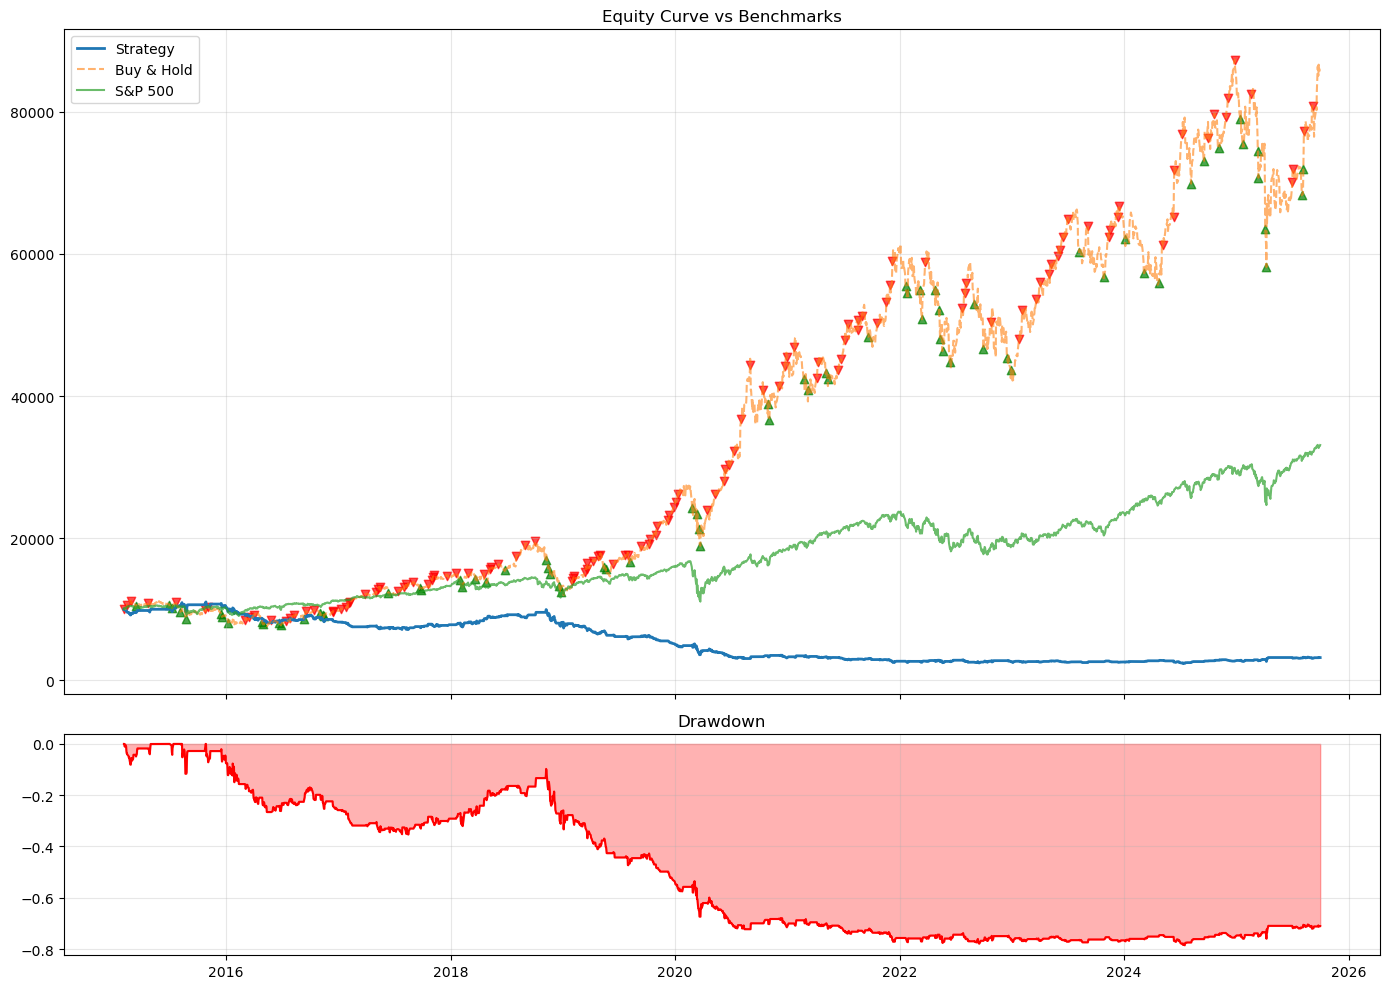

In [55]:
plot_backtest_results(equity, trades, df, df_SP500)

In [56]:
import math

def calculate_metrics(equity_df, trades_df, df_sp500):
    equity_df = equity_df.copy()
    equity_df['daily_return'] = equity_df['equity'].pct_change().fillna(0)
    
    total_trades = len(trades_df)
    winning_trades = len(trades_df[trades_df['pnl'] > 0])
    win_rate_strategy = winning_trades / total_trades if total_trades > 0 else 0
    
    equity_df['peak'] = equity_df['equity'].cummax()
    equity_df['drawdown'] = (equity_df['equity'] - equity_df['peak']) / equity_df['peak']
    max_drawdown_strategy = equity_df['drawdown'].min()

    merged_df = pd.merge(equity_df[['date', 'daily_return']], 
                         df_sp500[['date', 'close']], 
                         on='date', how='inner')
    
    merged_df['sp500_return'] = merged_df['close'].pct_change().fillna(0)
    
    merged_df['sp500_peak'] = merged_df['close'].cummax()
    merged_df['sp500_drawdown'] = (merged_df['close'] - merged_df['sp500_peak']) / merged_df['sp500_peak']
    max_drawdown_sp500 = merged_df['sp500_drawdown'].min()
    
    metrics = {
        'Strategy': {
            'Win Rate': win_rate_strategy,
            'Total Return': (equity_df['equity'].iloc[-1] / equity_df['equity'].iloc[0]) - 1,
            'Mean Daily Return': equity_df['daily_return'].mean(),
            'Std Daily Return': equity_df['daily_return'].std(),
            'Sharpe Ratio': (equity_df['daily_return'].mean() / equity_df['daily_return'].std()) * math.sqrt(252) if equity_df['daily_return'].std() != 0 else 0,
            'Max Drawdown': max_drawdown_strategy
        },
        'S&P 500': {
            'Win Rate': (merged_df['sp500_return'] > 0).mean(),
            'Total Return': (merged_df['close'].iloc[-1] / merged_df['close'].iloc[0]) - 1,
            'Mean Daily Return': merged_df['sp500_return'].mean(),
            'Std Daily Return': merged_df['sp500_return'].std(),
            'Sharpe Ratio': (merged_df['sp500_return'].mean() / merged_df['sp500_return'].std()) * math.sqrt(252) if merged_df['sp500_return'].std() != 0 else 0,
            'Max Drawdown': max_drawdown_sp500
        }
    }
    
    comparison_df = pd.DataFrame(metrics)
    
    return comparison_df


In [57]:
print(calculate_metrics(equity, trades, df_SP500))

                   Strategy   S&P 500
Win Rate           0.469697  0.539896
Total Return      -0.680129  2.309726
Mean Daily Return -0.000344  0.000511
Std Daily Return   0.012698  0.011351
Sharpe Ratio      -0.430599  0.714613
Max Drawdown      -0.784920 -0.339250
